# TD du 4 février 2025

# Exercice III

On considère le domaine $\Omega=[0,1]\times[0,1]$, la fonction $f\in L^{2}(\Omega)$, et l'EDP

$$(5.2)\quad\left\{
    \begin{array}{ll}
       - \Delta \displaystyle u=f &
       \textrm{dans}\ \Omega,\\
       u=0&\textrm{sur}\ \partial\Omega
    \end{array}\right.
$$

In [1]:
# On aura besoin des bibliothèques suivantes

import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import time


# On aura également les besoins suivants 

from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy import integrate

## Question 1

On souhaite écrire la formulation variationnelle. On suit les étapes indiquées dans l'exemple du handout https://cagnol.link/pde4handout

La formulation variationnelle obtenue est $$a(u,\varphi)=l(\varphi)$$
où $a$ est définie de $C^1_0(\Omega)\times C^1_0(\Omega)$ dans ${\mathbb{R}}$ par
$$a(u,v)=\int_{\Omega} \nabla u \cdot \nabla v$$
et $l$ est définie de $C^1_0(\Omega)$ dans $\mathbb {R}$ par $$l(v)=\int_{\Omega} gv$$
 


## Question 2

Définissons $L_x$ et $L_y$, posons $\Omega=[0,L_x]\times[0,L_y]$.

Choisissons la finesse de subdivision $J_x$ et $J_y$ de $[0,L_x]$ et $[0,L_y]$ respectivement. 

Pour $[0,L_x]$, on subdivise en $0,...,J_x+1$ points, il y en a donc $J_x+2$. 
Les points intérieurs (extrémités exclues) seront ainsi numérotés de 1 à $J_x$.

De manière analogue pour $[0,L_y]$, on subdivise en $0,...,J_y+1$ points, il y en a donc $J_y+2$.  Les points intérieurs (extrémités exclues) seront numérotées de 1 à $J_y$.

Comme on considère une subdivision uniforme, le pas (c'est-à-dire la longueur entre deux points de la discrétisation) est 
$$h_x = \frac{L_x}{J_x+1}$$
et de manière analogue
$$h_y = \frac{L_y}{J_y+1}$$


In [2]:
Lx = 6
Ly = 6

Jx = 5
Jy = 5

hx = Lx / (Jx+1)
hy = Ly / (Jy+1)

Soit $i\in\{1,...,J_y\}$ et $j\in\{1,...,J_x\}$.

Soit $(x,y)\in\Omega$, déterminons si $(x,y)$ dans l'hexagone ou non.
Si oui, déterminons dans quel triangle. La fonction suivante se charge de cela.

In [4]:
def QuelTriangle(x,y,j,i):

    if x>=j*hx and x<=(j+1)*hx and y>=i*hy and y<=(i+1)*hy: 
        # Quandrant nord-est
        
        if (x-j*hx)*hy/hx > (y-i*hy):            
            return 'T1'
        else: 
            return 'T2'
  

    elif x<=j*hx and x>=(j-1)*hx and y>=i*hy and y<=(i+1)*hy: 
        # Quandrant nord-ouest
        
        if y-hy*i <= (hy/hx)*(x-(j-1)*hx):
            return 'T3'
        else:
            return 'hors support'
 

    elif x<=j*hx and x>=(j-1)*hx and y<=i*hy and y>=(i-1)*hy: 
        # Quandrant sud-ouest
        
        if (x-j*hx)*hy/hx < (y-i*hy): 
            return 'T4'
        else:
            return 'T5'
        
        
    elif x>=j*hx and x<=(j+1)*hx and y<=i*hy and y>=(i-1)*hy: 
        # Quandrant sud-est
        
        if y>= hy/hx*x + hy*i-hy*(j+1):
            return 'T6'
        else:
            return 'hors support'
    
    else: 
        return 'hors support'

On détermine l'équation des six plans qui constituent les faces de la pyramide à six cotés, dont l'apex est en $(j h_x,i h_y,1)$. On en déduit l'expression de $\phi_{j,i}(x,y)$

In [5]:
def phi_ji(x,y,j,i):
    
    if x<0 or x>Lx or y<0 or y>Ly:
        return 0
    
    match QuelTriangle(x,y,j,i) :
        case 'T1':
            return -x/hx + j+1
        case 'T2':
            return -y/hy + i+1
        case 'T3':
            return x/hx - y/hy + i-j+1
        case 'T4':
            return x/hx + 1-j
        case 'T5':
            return y/hy + 1-i
        case 'T6':
            return -x/hx + y/hy + 1-i+j
        case 'hors support':
            return 0
    

SyntaxError: invalid syntax (3899112479.py, line 6)

In [6]:
print("Python version : ",sys.version)

Python version :  3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:35:41) 
[Clang 16.0.6 ]


**Remarque** : si vous avez une erreur de syntaxe avec *match*, c'est par ce que votre version de Python est strictement inférieure à 3.10.  Dans ce cas, vous pouvez ré-écrire ce qui précède avec des if ... elif ... else.

In [7]:
def phi_ji(x,y,j,i):
    
    if x<0 or x>Lx or y<0 or y>Ly:
        return 0
    
    if   QuelTriangle(x,y,j,i) == "T1":
        return -x/hx + j+1
    elif QuelTriangle(x,y,j,i) == 'T2':
        return -y/hy + i+1
    elif QuelTriangle(x,y,j,i) == 'T3':
        return x/hx - y/hy + i-j+1
    elif QuelTriangle(x,y,j,i) == 'T4':
        return x/hx + 1-j
    elif QuelTriangle(x,y,j,i) == 'T5':
        return y/hy + 1-i
    elif QuelTriangle(x,y,j,i) == 'T6':
        return -x/hx + y/hy + 1-i+j
    elif QuelTriangle(x,y,j,i) == 'hors support':
        return 0

On représente $\phi_{j,i}$ graphiquement.

numpy / matplotlib propose des méthodes pour ce faire.
Si vous ne les connaissez pas (et vous n'avez pas de raison de les connaitre), basez-vous sur la documentation de numpy / matplotlib largement disponible en ligne. A défaut tapez "plot a 3d function with Python" sur Google.

In [8]:
def Representer_phi (j,i):
    
    phi_ji_vect = np.vectorize(phi_ji, otypes=[np.float64])

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    x = np.arange(0, Lx, 0.01)
    y = np.arange(0, Ly, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = phi_ji_vect(X,Y,j,i)

    
    # On représente le graphe en 3D
    
    surf = ax.plot_surface(X, Y, Z, alpha=0.9)

    plt.title("phi_{%d,%d}"%(j,i))
    plt.show()
    
    
    # Pour les amoureux de la montagne, les courbes de niveau...
    
    fig, ax = plt.subplots()
    PCM=ax.contourf(X, Y, Z)
    
    plt.title("phi_{%d,%d}"%(j,i))
    plt.colorbar(PCM, ax=ax) 
    plt.show()

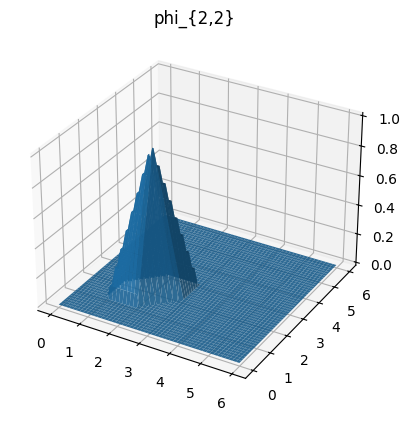

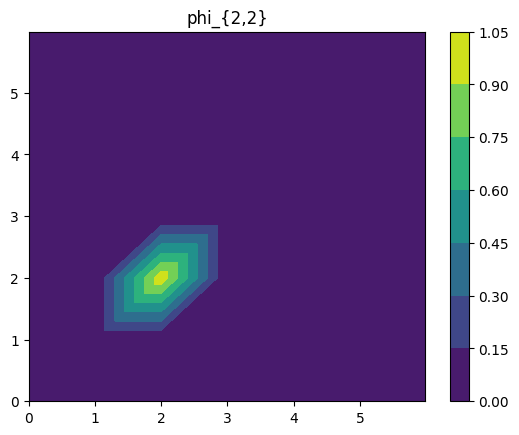

In [9]:
Representer_phi(2,2)

## Question 3

Le gradient de $\phi_{j,i}$ se calcule alors directement.

En toute rigueur il faudrait exclure les points où le gradient n'est pas défini mais la fonction sera intégrée et ces points consituent un ensemble de mesure nulle. Pour ne pas compliquer, on passe cela sous silence.

In [10]:
def del_phi_ji(x,y,j,i):
    
    if x<0 or x>Lx or y<0 or y>Ly:
        return 0
    
    if   QuelTriangle(x,y,j,i) == 'T1':
        return [-1/hx,0]
    elif QuelTriangle(x,y,j,i) == 'T2':
        return [0,-1/hy]
    elif QuelTriangle(x,y,j,i) == 'T3':
        return [1/hx,-1/hy]
    elif QuelTriangle(x,y,j,i) == 'T4':
        return [1/hx,0]
    elif QuelTriangle(x,y,j,i) == 'T5':
        return [0,1/hy]
    elif QuelTriangle(x,y,j,i) == 'T6':
        return [-1/hx,1/hy]
    elif QuelTriangle(x,y,j,i) == 'hors support':
        return [0,0]

## Question 4

L'applicaton de $\{1,...,J_x\}\times\{1,...,J_y\}$ dans $\{1,...,J_xJ_y\}$ définie par

$$(j,i)\mapsto j+J_x(i-1)$$

est bijective.

L'application réciproque est donnée par la division euclidienne par $J_x$.

On notera $J_x=J_xJ_y$

In [12]:
def Coord_ji_to_n (j,i):
    return (i-1)*Jx+j

def Coord_n_to_ji (n):
    return (n-1)%Jx+1, int((n-1)/Jx+1)

Jn = Coord_ji_to_n(Jx,Jy)

On vérifie notre bijection...

In [13]:
for i in range(1,Jx+1):
    for j in range(1,Jy+1):
        n = Coord_ji_to_n (j,i)
        print((j,i)," -> ",n," -> ",Coord_n_to_ji(n))

(1, 1)  ->  1  ->  (1, 1)
(2, 1)  ->  2  ->  (2, 1)
(3, 1)  ->  3  ->  (3, 1)
(4, 1)  ->  4  ->  (4, 1)
(5, 1)  ->  5  ->  (5, 1)
(1, 2)  ->  6  ->  (1, 2)
(2, 2)  ->  7  ->  (2, 2)
(3, 2)  ->  8  ->  (3, 2)
(4, 2)  ->  9  ->  (4, 2)
(5, 2)  ->  10  ->  (5, 2)
(1, 3)  ->  11  ->  (1, 3)
(2, 3)  ->  12  ->  (2, 3)
(3, 3)  ->  13  ->  (3, 3)
(4, 3)  ->  14  ->  (4, 3)
(5, 3)  ->  15  ->  (5, 3)
(1, 4)  ->  16  ->  (1, 4)
(2, 4)  ->  17  ->  (2, 4)
(3, 4)  ->  18  ->  (3, 4)
(4, 4)  ->  19  ->  (4, 4)
(5, 4)  ->  20  ->  (5, 4)
(1, 5)  ->  21  ->  (1, 5)
(2, 5)  ->  22  ->  (2, 5)
(3, 5)  ->  23  ->  (3, 5)
(4, 5)  ->  24  ->  (4, 5)
(5, 5)  ->  25  ->  (5, 5)


On définit alors $\phi_n$ et $\nabla\phi_n$ 

In [14]:
def phi_n(x,y,n):
    j,i = Coord_n_to_ji(n)
    return phi_ji(x,y,j,i)

def del_phi_n(x,y,n):
    j,i = Coord_n_to_ji(n)
    return del_phi_ji(x,y,j,i)

## Question 5

In [16]:
def del_phi_n_dot_del_phi_m(x,y,n,m):
    return np.dot(del_phi_n(x,y,n),del_phi_n(x,y,m))

In [17]:
def Anm(n,m):
    res, err = integrate.dblquad(del_phi_n_dot_del_phi_m, 0, Lx, lambda x: 0, lambda x: Ly, args=(n,m))
    return res

## Question 6

On construit alors la matrice.

Comme on s'y prend relativement mal, vous pouvez aller prendre un café.
En effet, on intégre numériquement pour toutes les combinaisons d'éléments alors que pour la plupart, le résulat sera 0. En outre, on n'exploite pas le fait que l'on intègre une constante !

Notons que l'élément (n,m) est stocké en comme (n-1,m-1) car la numérotation commence à 0 pour les tableaux.

In [18]:
debut = time.time()

A = np.zeros([Jn,Jn])

for n in range(1,Jn+1):
    for m in range (1,Jn+1):
        A[n-1,m-1]=Anm(n,m)
        
fin = time.time()

print("Il a fallu %.0f secondes pour faire ce calcul (en s'y prenant mal)"%(fin-debut))

/opt/homebrew/anaconda3/envs/fenics-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/anaconda3/envs/fenics-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtai

Il a fallu 1080 secondes pour faire ce calcul (en s'y prenant mal)


In [19]:
A

array([[ 4.0000373 , -0.90636304,  0.        ,  0.        ,  0.        ,
        -0.99999824,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.90636304,  4.00004454, -0.88900287,  0.        ,  0.        ,
         0.        , -0.99999818,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.88900287,  3.99996076, -0.88926319,  0.        ,
         0.        ,  0.        , -0.99996281,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [28]:
for i in range(Jn):
    for j in range(Jn):
        print("%2.f"%A[i,j], end=" ")
    print("")

 4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -1  4  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0 -1  0  0  0 -1  4  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0 -1  0  0  0  0  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0 
 0  0  0  0 

## Question 7

Il reste à présent à calculer le membre de droite $F$ puis à résoudre $AU=F$.

On commence par construire le vecteur $F$.

In [20]:
def f(x,y):
    return math.cos(x)*math.cos(y)

In [21]:
def f_times_phi(x,y,n):
    return f(x,y)*phi_n(x,y,n)

In [22]:
def Fn(n):
    res, err = integrate.dblquad(f_times_phi, 0, Lx, lambda x: 0, lambda x: Ly, args=[n])
    return res

In [23]:
F = np.zeros((Jn), float)

for n in range(1,Jn+1):
    F[n-1]=Fn(n)

/opt/homebrew/anaconda3/envs/fenics-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/anaconda3/envs/fenics-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [24]:
F

array([ 0.29872284, -0.13457542, -0.44414566, -0.34537043,  0.07093678,
       -0.13457542,  0.20685379,  0.35810259,  0.1801135 , -0.16347109,
       -0.44414564,  0.35810257,  0.83111291,  0.5400019 , -0.24758439,
       -0.34537043,  0.1801135 ,  0.54000191,  0.40341505, -0.10406975,
        0.07093678, -0.16347109, -0.24758442, -0.10406975,  0.13512615])

On résoud maintenant $AU=F$.

Si $J_x$ et $J_y$ sont grands (et donc $J_n=J_xJ_y$ l'est), la résolution du système posera problème. De fait, le stockage de la matrice posera problème. Il faudra sans doute développer des stratégies sur le sujet. Ce sera l'objet du chapitre 7.

In [25]:
U = np.linalg.solve(A,F)

In [26]:
U

array([ 0.08767511,  0.0310335 , -0.03473902, -0.0375707 ,  0.01553912,
        0.02385328,  0.21012881,  0.31102386,  0.21189472,  0.02527342,
       -0.04813408,  0.30443495,  0.54549023,  0.4056362 ,  0.05697253,
       -0.04814797,  0.20820138,  0.40853001,  0.33409053,  0.08258498,
        0.01220427,  0.02871798,  0.06643845,  0.08918191,  0.0746349 ])

On dispose maintenant des coefficients dans le vecteur $U$.

On construit l'approximation de la solution.

In [27]:
def u_approx(x,y):
    
    val = 0
    
    for n in range(1,Jn+1):
        val = val + U[n-1]*phi_n(x,y,n)
    
    # Ici on s'y prend très mal, il vaudrait mieux considérer uniquement les phi dont on sait
    # que leur support contient (x,y) !
    
    return val

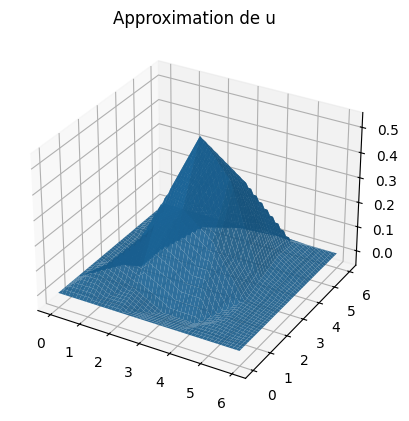

In [29]:
u_vect = np.vectorize(u_approx, otypes=[np.float64])

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0, Lx, 0.01)
y = np.arange(0, Ly, 0.01)

X, Y = np.meshgrid(x, y)
Z = u_vect(X,Y)
  
# On représente le graphe en 3D
    
surf = ax.plot_surface(X, Y, Z, alpha=0.9)

plt.title("Approximation de u")
plt.show()

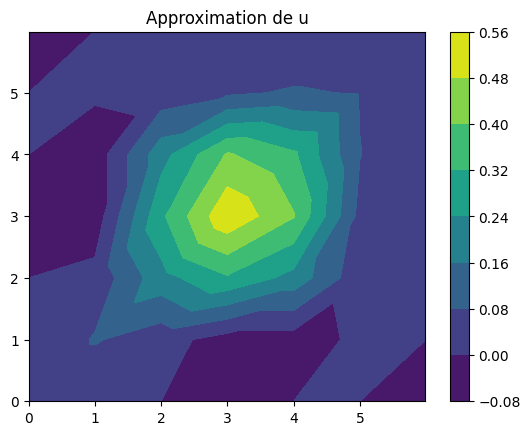

In [30]:
# Pour les amoureux de la montagne, les courbes de niveau...
    
fig, ax = plt.subplots()
PCM=ax.contourf(X, Y, Z)
    
plt.title("Approximation de u")
plt.colorbar(PCM, ax=ax) 
plt.show()


In [32]:
u_approx(Lx/2,Ly/2)

0.5454902339327472